In [ ]:
# https://towardsdatascience.com/introduction-to-git-data-extraction-and-analysis-in-python-e7e2bf9b4606
import json
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import asyncio
import time

In [ ]:
# for aiohttp - async requests
!pip install aiohttp[speedups]
# update for python kernel so await foo() can be used
!pip install ipython ipykernel --upgrade

     |████████████████████████████████| 1.1 MB 12.9 MB/s 
     |████████████████████████████████| 271 kB 45.5 MB/s 
     |████████████████████████████████| 94 kB 330 kB/s 
     |████████████████████████████████| 144 kB 41.8 MB/s 
     |████████████████████████████████| 357 kB 5.1 MB/s 
     |████████████████████████████████| 263 kB 39.4 MB/s 
     |████████████████████████████████| 291 kB 33.6 MB/s 
     |████████████████████████████████| 793 kB 12.7 MB/s 
     |████████████████████████████████| 130 kB 41.8 MB/s 
     |████████████████████████████████| 381 kB 36.6 MB/s 
     |████████████████████████████████| 428 kB 33.1 MB/s 
     |████████████████████████████████| 130 kB 34.5 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfull

In [ ]:
from utils_notebooks.token_pool import tokenPool
from utils_notebooks.get_data_from_api import infoForFirstTask

In [ ]:
import os

# add personal access token to get higher api rquest limit
os.environ['TOKENS']= 'XXX-XXX'

In [ ]:
import requests
import pandas as pd
import os
pd.options.display.max_colwidth = 100

In [1]:
from google.colab import drive
drive.mount('/content/drive',  force_remount = True)

Mounted at /content/drive


In [ ]:

path_to_data = './data/repos.csv' # here only python paths

In [ ]:
data = pd.read_csv(path_to_data,header = 0)
data.head()

data['repo_name'] = data.url.apply( lambda x: x.split('/')[-1])
data['user_name'] = data.url.apply( lambda x: x.split('/')[-2])
data['github_link'] = data.apply( lambda row: f"https://github.com/{row['user_name']}/{row['repo_name']}.git", axis = 1 )
# remove duplicates
data = data.drop_duplicates(subset=['id'])


In [ ]:
token_pool = tokenPool(os.environ.get('TOKENS'))

In [ ]:
firstTask = infoForFirstTask()

In [ ]:
# get readme synchronous

readme_extension = '.md'
readme_path = '/'

readme_files = []
for idx,row in data.iterrows():
  user_name, repo_name, github_token = row['user_name'], row['repo_name'], token_pool.get_token()
  # firstTask.find_files_with_extension(user_name, repo_name, readme_extension, github_token, idx)
  readme_files.append(firstTask.find_files_with_extension(user_name, repo_name, readme_extension, github_token, idx))

In [ ]:
data.head(10)

,id,url,created_at,forked_from,owner_id,users_cnt,repo_name,user_name,github_link
0,8955879,https://api.github.com/repos/rtCamp/rt-lib,2012-08-29 09:06:21 UTC,NaN,148959,30,rt-lib,rtCamp,https://github.com/rtCamp/rt-lib.git
1,8631580,https://api.github.com/repos/icstars/EatNRUn,2014-03-17 17:45:35 UTC,NaN,1608318,31,EatNRUn,icstars,https://github.com/icstars/EatNRUn.git
2,8809028,https://api.github.com/repos/edx/edx-ora2,2013-12-23 20:54:54 UTC,NaN,288514,90,edx-ora2,edx,https://github.com/edx/edx-ora2.git
3,8912187,https://api.github.com/repos/zipfian/ad-hoc-lectures,2013-09-18 22:54:05 UTC,NaN,2422758,23,ad-hoc-lectures,zipfian,https://github.com/zipfian/ad-hoc-lectures.git
4,7996025,https://api.github.com/repos/jpgohlke/twitch-chat-filter,2014-02-18 15:25:51 UTC,NaN,2404854,29,twitch-chat-filter,jpgohlke,https://github.com/jpgohlke/twitch-chat-filter.git
5,9123447,https://api.github.com/repos/puruckertom/ubertool_eco,2014-04-09 20:35:04 UTC,NaN,1698024,24,ubertool_eco,puruckertom,https://github.com/puruckertom/ubertool_eco.git
6,77793728,https://api.github.com/repos/interactivellama/design-system-react,2017-10-18 23:15:44 UTC,77781652.0,884810,28,design-system-react,interactivellama,https://github.com/interactivellama/design-system-react.git
7,18761729,https://api.github.com/repos/opentraffic/traffic-engine-simulator,2015-03-06 23:13:55 UTC,NaN,7739378,23,traffic-engine-simulator,opentraffic,https://github.com/opentraffic/traffic-engine-simulator.git
8,20076023,https://api.github.com/repos/gepabla/cenfoteca,2015-05-15 21:09:45 UTC,NaN,694582,29,cenfoteca,gepabla,https://github.com/gepabla/cenfoteca.git
9,119102309,https://api.github.com/repos/RemiFreret/NuitInfo2018,2018-12-05 14:17:08 UTC,NaN,11075404,26,NuitInfo2018,RemiFreret,https://github.com/RemiFreret/NuitInfo2018.git


In [ ]:
import asyncio
import time

# get asynchronously size information about git repos

small_data = data
num_of_workers = 40
smaller_chunks_of_repos = [small_data[i:i+ num_of_workers] for i in range(0,len(small_data),num_of_workers)]

size = []
for e,git_repos in enumerate(smaller_chunks_of_repos):
  if e > 0 and e%25 == 0:
    print(f'{e*num_of_workers} done')
  coroutines = [ firstTask.as_size_of_repo( row['user_name'], row['repo_name'], github_token = token_pool.get_token(), idx = idx) for idx,row in git_repos.iterrows()]
  #!pip install ipython ipykernel --upgrade
  # RESTART RUNTIME
  output = await asyncio.gather(*coroutines)
  size = size + output


1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done
16000 done
17000 done
18000 done
19000 done
20000 done
21000 done
22000 done
23000 done
24000 done
25000 done
26000 done
27000 done
28000 done
29000 done
30000 done
31000 done
32000 done
33000 done
34000 done
35000 done
36000 done
37000 done
38000 done
39000 done
40000 done
41000 done
42000 done
43000 done
44000 done
45000 done
46000 done
47000 done
48000 done
49000 done
50000 done
51000 done
52000 done


In [ ]:
print(size[50000:51000])

[{'size': 34265, 'idx': 50000}, {'size': -1, 'idx': 50001}, {'size': 424, 'idx': 50002}, {'size': 648, 'idx': 50003}, {'size': 4749, 'idx': 50004}, {'size': 204, 'idx': 50005}, {'size': -1, 'idx': 50006}, {'size': 8703, 'idx': 50007}, {'size': 63828, 'idx': 50008}, {'size': 280, 'idx': 50009}, {'size': 122896, 'idx': 50010}, {'size': 429, 'idx': 50011}, {'size': 2970, 'idx': 50012}, {'size': 312, 'idx': 50013}, {'size': -1, 'idx': 50014}, {'size': 132, 'idx': 50015}, {'size': 120, 'idx': 50016}, {'size': 1080, 'idx': 50017}, {'size': 300, 'idx': 50018}, {'size': 4640, 'idx': 50019}, {'size': 167, 'idx': 50020}, {'size': 2183, 'idx': 50021}, {'size': 63, 'idx': 50022}, {'size': 94661, 'idx': 50023}, {'size': -1, 'idx': 50024}, {'size': 28240, 'idx': 50025}, {'size': -1, 'idx': 50026}, {'size': 367191, 'idx': 50027}, {'size': 7506, 'idx': 50028}, {'size': -1, 'idx': 50029}, {'size': 12189, 'idx': 50030}, {'size': -1, 'idx': 50031}, {'size': 5280, 'idx': 50032}, {'size': 224, 'idx': 50033

In [ ]:
print(f'repositories checked for size : {len(size)} ')
# add size to dataframe
data['repo_size'] = [ d['size'] for d in size]

# romeve repositories which are empty/do not exist
idx = data.index[(data['repo_size'] == -1) | (data['repo_size'] == 0)]
data.drop(index = idx, inplace = True)
print(f'data after cleaning repos {len(data)}')

# sort by repo_size
data.sort_values(by=['repo_size'], inplace = True, ascending = True)
data.reset_index(inplace = True, drop = True)

repositories checked for size : 52870 
data after cleaning repos 45308


In [ ]:
len(data)

19893175

In [ ]:
data = pd.read_csv("./data/repos_with_repo_size.csv")

(array([14470.,   805.,   300.,   193.,   100.,    88.,    59.,    47.,
           35.,    28.]),
 array([1.0000000e+00, 1.2159370e+05, 2.4318640e+05, 3.6477910e+05,
        4.8637180e+05, 6.0796450e+05, 7.2955720e+05, 8.5114990e+05,
        9.7274260e+05, 1.0943353e+06, 1.2159280e+06]),
 <a list of 10 Patch objects>)

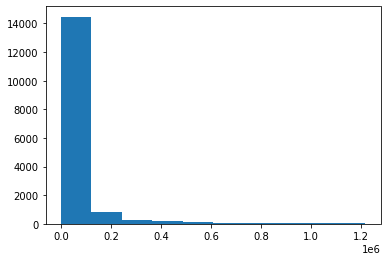

In [ ]:
from matplotlib import pyplot

# this graph shows uneven distribution of repos with different size

pyplot.hist(x = data.repo_size.to_list()[: int(len(data)*(99/100))])

In [ ]:
print(len(data[(data.repo_size> 10000)&(data.repo_size < 30000)])) - # small size
print(len(data[(data.repo_size> 30000)&(data.repo_size < 90000)])) - # mid size
print(len(data[(data.repo_size > 90000)])) - #big size

2188
2006
2287


In [ ]:
# find readme in github repositories asynchronously

firstTask = infoForFirstTask()

small_data = data.tail(2000).head(100)
readme_extension = 'md'
readme_path = '/'

readme_files = []
asyncio_semaphore = asyncio.Semaphore(50)
for idx, row in small_data.iterrows():
  if e > 0 and e%25 == 0:
    print(f'{e*num_of_workers} done')
  coroutines = [ firstTask.as_find_files_in_repo( row['user_name'], row['repo_name'], github_token = token_pool.get_token(), idx = idx,\
                                                  asyncio_semaphore = asyncio_semaphore, extension=readme_extension,file_name="README", path=readme_path)]
  
  output = await asyncio.gather(*coroutines)
  readme_files = readme_files + output

In [ ]:
print(readme_files)

[[], [{'path': 'README.md', 'id': 14289}], [], [{'path': 'README.md', 'id': 14291}], [], [], [], [], [{'path': 'README.md', 'id': 14296}], [], [{'path': 'README.md', 'id': 14298}], [{'path': 'README.md', 'id': 14299}], [], [{'path': 'README.md', 'id': 14301}], [], [], [{'path': 'README.md', 'id': 14304}], [], [], [{'path': 'README.md', 'id': 14307}], [], [{'path': 'README.md', 'id': 14309}], [{'path': 'README.md', 'id': 14310}], [], [], [], [], [], [], [{'path': 'README.md', 'id': 14317}], [], [{'path': 'README.md', 'id': 14319}], [], [], [], [{'path': 'README.md', 'id': 14323}], [], [], [{'path': 'README.md', 'id': 14326}], [{'path': 'README.md', 'id': 14327}], [{'path': 'README.md', 'id': 14328}], [], [{'path': 'README.md', 'id': 14330}], [], [], [{'path': 'README.md', 'id': 14333}], [{'path': 'README.md', 'id': 14334}], [], [], [{'path': 'README.md', 'id': 14337}], [{'path': 'README.md', 'id': 14338}], [{'path': 'README.md', 'id': 14339}], [], [], [], [], [{'path': 'README.md', 'id'

In [ ]:
small_data.head(20)

,id,url,created_at,forked_from,owner_id,users_cnt,repo_name,user_name,github_link,repo_size
14288,400756,https://api.github.com/repos/syddjurs/os2web-deploy,2012-11-15T13:41:09Z,1398992.0,122191,6,os2web-deploy,syddjurs,https://github.com/syddjurs/os2web-deploy.git,107939
14289,21584340,https://api.github.com/repos/ruigulala/ConAnalysis,2015-06-22T15:59:10Z,NaN,6621689,5,ConAnalysis,ruigulala,https://github.com/ruigulala/ConAnalysis.git,107940
14290,15665468,https://api.github.com/repos/bluemellophone/gzc-client,2015-01-28T18:03:44Z,NaN,943928,6,gzc-client,bluemellophone,https://github.com/bluemellophone/gzc-client.git,108004
14291,10585765,https://api.github.com/repos/ExCiteS/Sapelli,2014-07-03T11:12:32Z,NaN,2799287,5,Sapelli,ExCiteS,https://github.com/ExCiteS/Sapelli.git,108169
14292,12106019,https://api.github.com/repos/GeographicaGS/moocng,2014-09-01T10:51:39Z,43864.0,3698818,6,moocng,GeographicaGS,https://github.com/GeographicaGS/moocng.git,108188
14293,17461417,https://api.github.com/repos/adilsonv77/nobugssnackbar,2015-03-13T08:13:51Z,NaN,1185373,5,nobugssnackbar,adilsonv77,https://github.com/adilsonv77/nobugssnackbar.git,108323
14294,30595250,https://api.github.com/repos/mverma16/faveo-helpdesk,2016-02-19T04:59:04Z,19371670.0,10801849,9,faveo-helpdesk,mverma16,https://github.com/mverma16/faveo-helpdesk.git,108373
14295,8536070,https://api.github.com/repos/jasnowiss/Tracks,2014-03-13T01:40:54Z,NaN,2767782,5,Tracks,jasnowiss,https://github.com/jasnowiss/Tracks.git,108485
14296,28320409,https://api.github.com/repos/RaveCenter/OwlEyesVR,2015-03-23T23:35:31Z,NaN,9279622,6,OwlEyesVR,RaveCenter,https://github.com/RaveCenter/OwlEyesVR.git,108527
14297,9279242,https://api.github.com/repos/tkalbar/ibrdtn,2014-04-21T17:24:35Z,3048291.0,3653148,5,ibrdtn,tkalbar,https://github.com/tkalbar/ibrdtn.git,108647


In [ ]:
del firstTask

In [ ]:
small_data.head(10)

In [ ]:
# find jupyter notebooks in repos

firstTask = infoForFirstTask()

small_data = data.head(80)
num_of_workers = 40
smaller_chunks_of_repos = [small_data[i:i+ num_of_workers] for i in range(0,len(small_data),num_of_workers)]
extension = 'ipynb'

jupyter_notebooks = []
for e,git_repos in enumerate(smaller_chunks_of_repos):
  if e > 0 and e%25 == 0:
    print(f'{e*num_of_workers} done')
  coroutines = [ firstTask.as_find_files_in_repo( row['user_name'], row['repo_name'], github_token = token_pool.get_token(), idx = idx,\
                                                  extension=extension) for idx,row in git_repos.iterrows()]
  
  output = await asyncio.gather(*coroutines)
  jupyter_notebooks = jupyter_notebooks + output